<a href="https://colab.research.google.com/github/Jaireth-05/Challenge_dataScience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [62]:
ingresos_totales = df_total.groupby("Tienda")["Precio"].sum().reset_index()
ingresos_totales.columns = ["Tienda", "Ingreso Total"]
print(ingresos_totales)

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


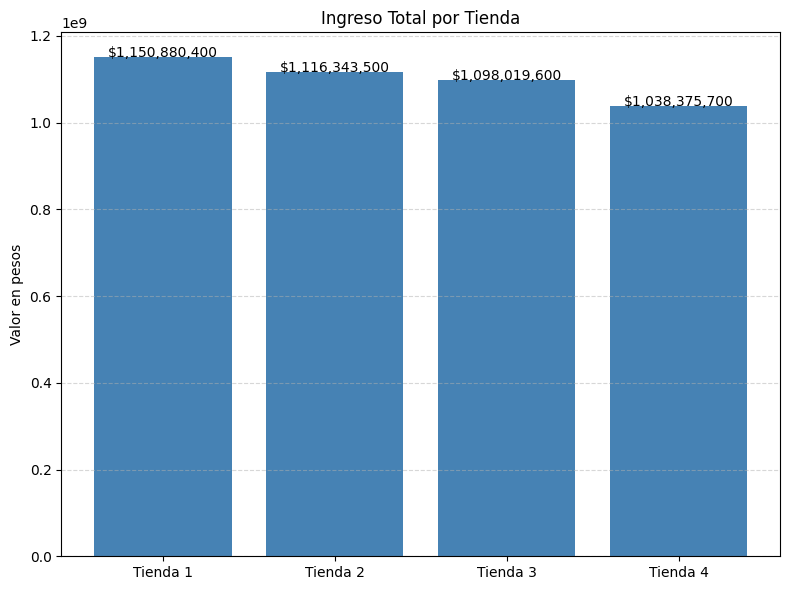

In [64]:
plt.figure(figsize=(8,6))
plt.bar(ingresos_totales["Tienda"], ingresos_totales["Ingreso Total"], color="steelblue")
plt.title("Ingreso Total por Tienda")
plt.ylabel("Valor en pesos")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Agregar etiquetas de valores sobre las barras
for i, valor in enumerate(ingresos_totales["Ingreso Total"]):
    plt.text(i, valor + 10000, f"${int(valor):,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [65]:
ingresos_por_categoria = df_total.groupby("Categoría del Producto")["Precio"].sum().reset_index()
ingresos_por_categoria.columns = ["Categoría", "Ingreso Total"]
print(ingresos_por_categoria)

                 Categoría  Ingreso Total
0  Artículos para el hogar   5.757980e+07
1     Deportes y diversión   1.429777e+08
2        Electrodomésticos   1.324751e+09
3             Electrónicos   1.660576e+09
4   Instrumentos musicales   3.487726e+08
5                 Juguetes   7.360440e+07
6                   Libros   3.769610e+07
7                  Muebles   7.576610e+08


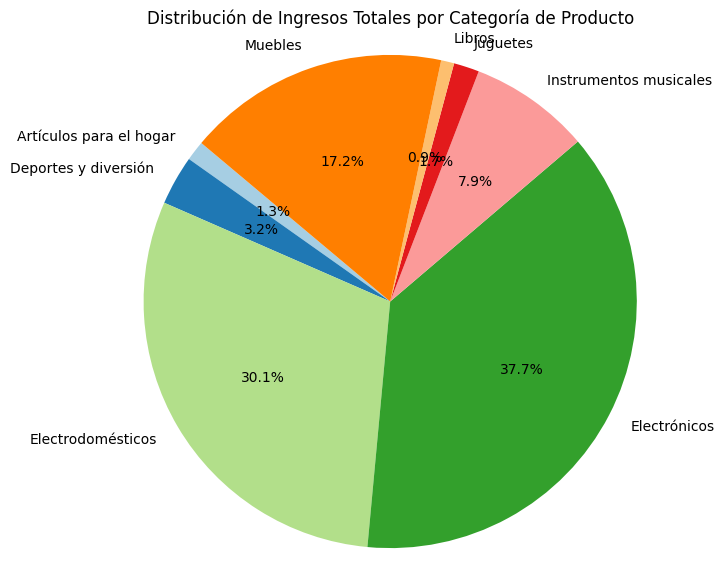

In [66]:
plt.figure(figsize=(7,7))
plt.pie(
    ingresos_por_categoria["Ingreso Total"],
    labels=ingresos_por_categoria["Categoría"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors  # Colores bonitos
)
plt.title("Distribución de Ingresos Totales por Categoría de Producto")
plt.axis("equal")
plt.show()

# 3. Calificación promedio de la tienda


In [48]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [49]:
calificacion_promedio = df_total.groupby("Tienda")["Calificación"].mean().reset_index()
calificacion_promedio.columns = ["Tienda", "Calificación Promedio"]
print(calificacion_promedio)

     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


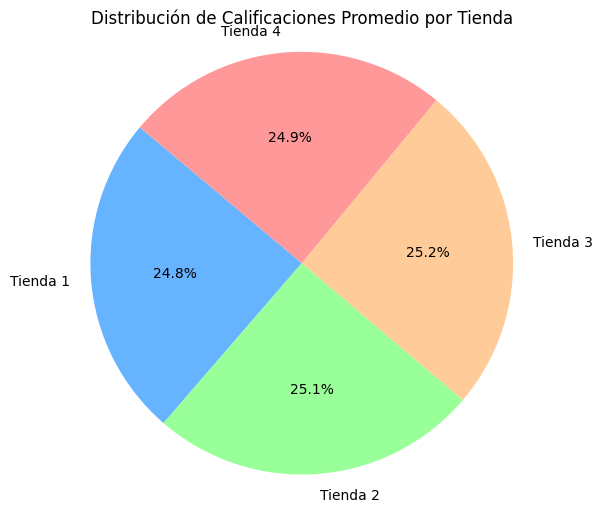

In [50]:
plt.figure(figsize=(6,6))
plt.pie(
    calificacion_promedio["Calificación Promedio"],
    labels=calificacion_promedio["Tienda"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"]
)
plt.title("Distribución de Calificaciones Promedio por Tienda")
plt.axis("equal")
plt.show()

# 4. Productos más y menos vendidos

In [52]:
ventas_productos = df_total.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad Vendida")
productos_destacados = []

for tienda in ventas_productos["Tienda"].unique():
    tienda_data = ventas_productos[ventas_productos["Tienda"] == tienda]

    max_vendido = tienda_data.loc[tienda_data["Cantidad Vendida"].idxmax()]
    min_vendido = tienda_data.loc[tienda_data["Cantidad Vendida"].idxmin()]

    productos_destacados.append({
        "Tienda": tienda,
        "Más vendido": max_vendido["Producto"],
        "Unidades más vendido": max_vendido["Cantidad Vendida"],
        "Menos vendido": min_vendido["Producto"],
        "Unidades menos vendido": min_vendido["Cantidad Vendida"]
    })

# Convertir a DataFrame
productos_resumen = pd.DataFrame(productos_destacados)
print(productos_resumen)



     Tienda                Más vendido  Unidades más vendido  \
0  Tienda 1                    Armario                    60   
1  Tienda 2  Iniciando en programación                    65   
2  Tienda 3              Kit de bancas                    57   
3  Tienda 4                   Cama box                    62   

               Menos vendido  Unidades menos vendido  
0  Auriculares con micrófono                      33  
1              Juego de mesa                      32  
2    Bloques de construcción                      35  
3         Guitarra eléctrica                      33  


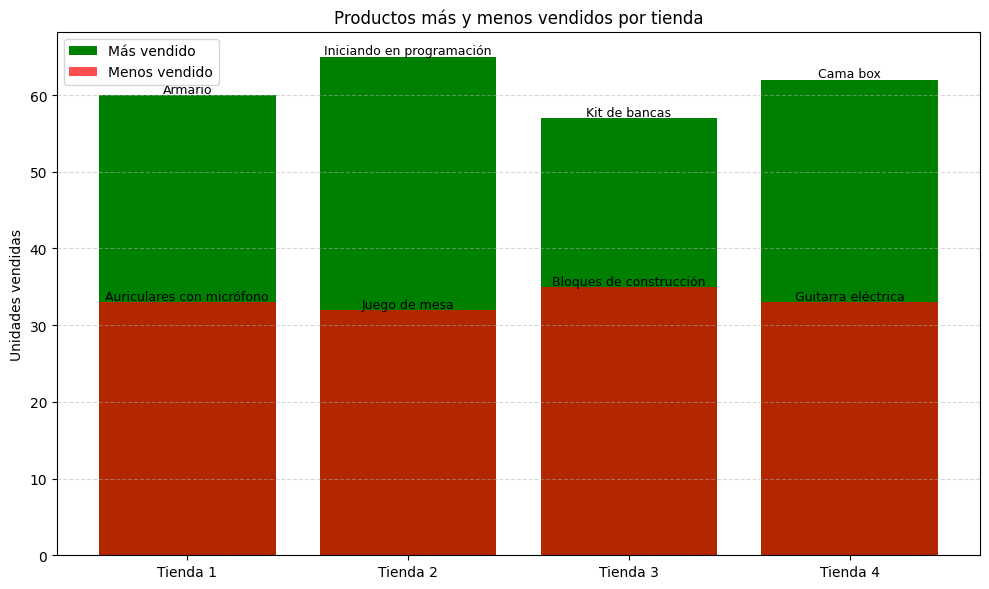

In [59]:
plt.figure(figsize=(10,6))

bar1 = plt.bar(productos_resumen["Tienda"], productos_resumen["Unidades más vendido"], label="Más vendido", color="green")
bar2 = plt.bar(productos_resumen["Tienda"], productos_resumen["Unidades menos vendido"], label="Menos vendido", color="red", alpha=0.7)

for i in range(len(productos_resumen)):
    plt.text(x=bar1[i].get_x() + bar1[i].get_width()/2,
             y=bar1[i].get_height() + 0.3,
             s=productos_resumen["Más vendido"][i],
             ha='center', fontsize=9, color='black')

    plt.text(x=bar2[i].get_x() + bar2[i].get_width()/2,
             y=bar2[i].get_height() + 0.3,
             s=productos_resumen["Menos vendido"][i],
             ha='center', fontsize=9, color='black')

plt.title("Productos más y menos vendidos por tienda")
plt.ylabel("Unidades vendidas")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [60]:
envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().reset_index()
envio_promedio.columns = ["Tienda", "Costo de Envío Promedio"]
print(envio_promedio)

     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


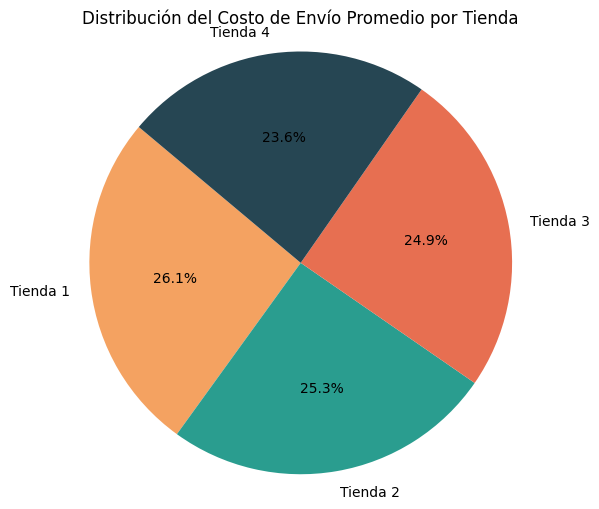

In [61]:
plt.figure(figsize=(6,6))
plt.pie(
    envio_promedio["Costo de Envío Promedio"],
    labels=envio_promedio["Tienda"],
    autopct='%1.1f%%',
    startangle=140,
    colors=["#f4a261", "#2a9d8f", "#e76f51", "#264653"]
)
plt.title("Distribución del Costo de Envío Promedio por Tienda")
plt.axis("equal")
plt.show()

#Informe Análisis de Tiendas

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas virtuales con base en múltiples criterios clave para tomar una decisión informada sobre en **cuál tienda debería vender el Sr. Juan** sus productos.

Los factores analizados incluyen:  
- Los **ingresos totales** por tienda  
- Las **categorías de productos más y menos vendidas**  
- Las **calificaciones promedio de los clientes**  
- Los **productos más y menos vendidos**  
- El **costo de envío promedio** por tienda  

A partir de este análisis, se identifican fortalezas y debilidades de cada tienda, permitiendo recomendar la mejor opción de venta para maximizar beneficios y satisfacción del cliente.

**Ingresos totales:**
Se sumaron los ingresos generados por la venta de productos en cada tienda. La tienda con mayores ingresos fue **Tienda 1**, seguida por **Tienda 2**.

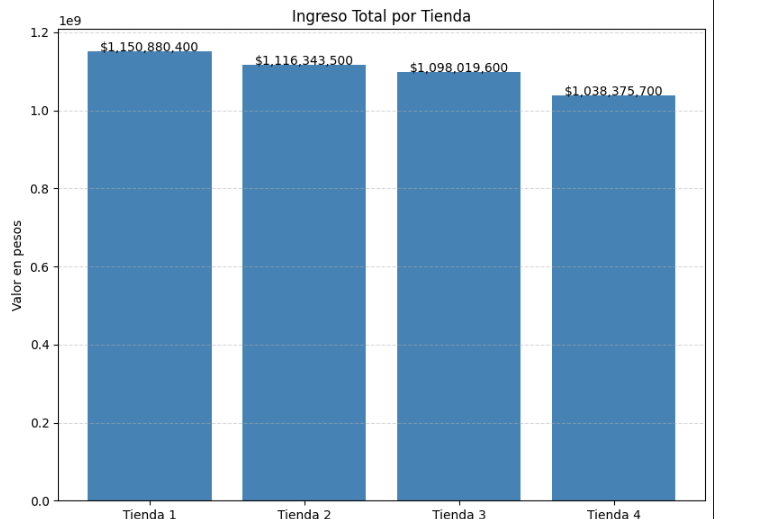

Este resultado muestra que Tienda 1 tiene el mayor volumen de ventas o productos con precios más altos, lo que la posiciona como una opción atractiva para maximizar ingresos.

**Categorías de Productos**
Se identificaron las categorías de productos más vendidas por tienda. En general, las categorías **"Electronicos"** y **"Electrodomesticos"** fueron las más destacadas en ventas.

Por el contrario, categorías como **"Libros"** y **"Artículos para el hogar"** registraron menor volumen de ventas, lo que indica menor rotación de estos productos.

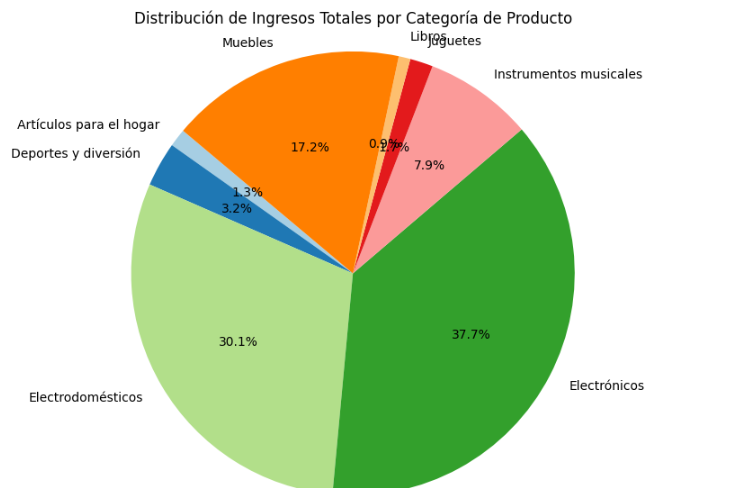

**calificaciones promedio**
Se analizaron las calificaciones promedio que los clientes otorgaron a cada tienda. La tienda mejor valorada fue:

- **Tienda 3** con un promedio de ** 4.048326**
- La tienda peor valorada fue **Tienda 1**, con un promedio de **3.976685*
Aunque su promedio no estuvo tan mal, fue un promedio bajo en comparación a las otras tiendas

Esto refleja el nivel de satisfacción general que los compradores experimentaron.

En el siguiente grafico se muestra en porcentajes la valoración de las tiendas:
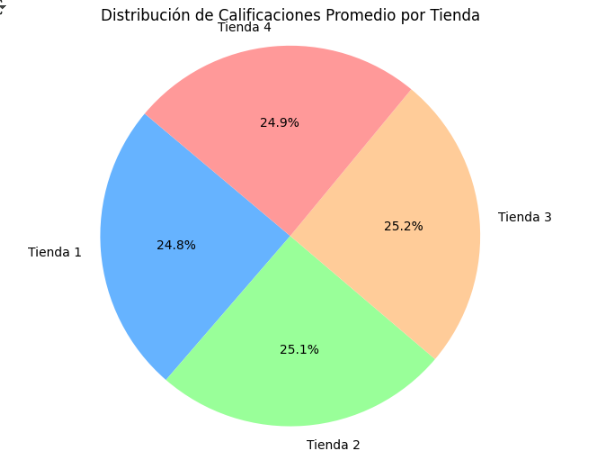

**productos más y menos vendidos.**
A continuación se muestran los productos más y menos vendidos en cada tienda, lo cual ayuda a identificar tendencias de consumo:

- En **Tienda 1**, el producto más vendido fue **"Armario"**, mientras que el menos vendido fue **" Auriculares con micrófono"**
- En **Tienda 2**, destacó el **"Iniciando en programación"** como el más vendido Y el menos vendido fue **"Juego de mesa"**.
- En **Tienda 3**, destacó el **"Kit de bancas"** como el más vendido y el que menos destacó fue **"Bloques de construcción"**.
- En **Tienda 4**, destacó el **"Cama box"** como el más vendido y el menos vendido **"Guitarra eléctrica"**.

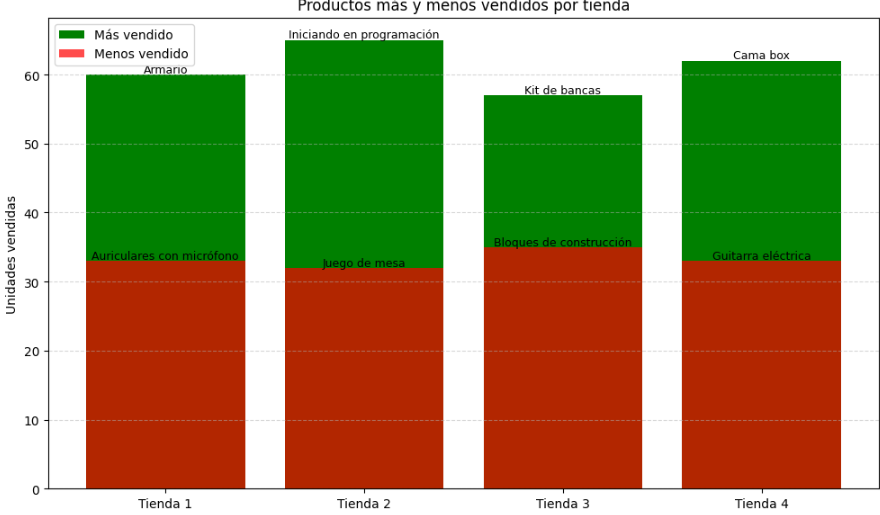

Este análisis permite observar que los productos de mobiliario y material educativo son bien recibidos, mientras que artículos más específicos como juguetes o instrumentos musicales tienen menor rotación.

**coste de envío promedio**

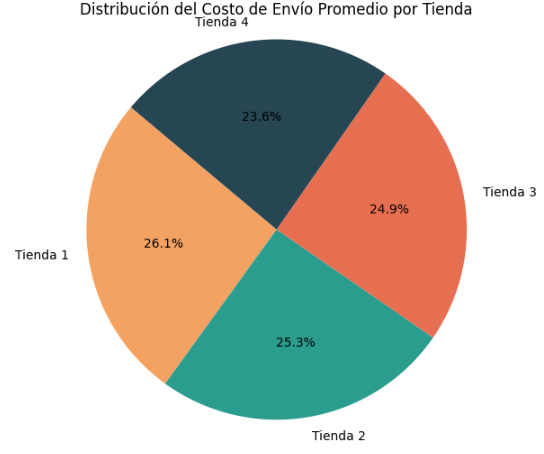

Se analizó el costo de envío promedio en cada tienda. Los resultados indican lo siguiente:
Tienda 1 tiene el costo de envío promedio más alto (26.1% del total).
Tienda 4 presenta el costo más bajo (23.6% del total).
Tienda 2 y Tienda 3 están en valores intermedios (25.3% y 24.9% respectivamente).

Aunque las diferencias no son extremas, el costo de envío puede influir en la decisión del cliente final. Tiendas con menor costo logístico pueden resultar más atractivas y competitivas.

**Conclusión**
Después de analizar en profundidad los ingresos generados, las categorías de productos, las calificaciones de los clientes, los productos más y menos vendidos y los costos de envío promedio, se concluye que la mejor opción para que el Sr. Juan venda sus productos es la Tienda 3.

A continuación se presentan las razones que justifican esta elección:
 -Mayor calificación promedio de los clientes: Tienda 3 obtuvo la mejor calificación entre todas, lo que indica alto nivel de satisfacción, confianza del cliente y un buen manejo postventa. Esto favorece la fidelización y las recomendaciones.

 -Ingresos competitivos: Aunque no fue la tienda de mayores ingresos, Tienda 3 ocupó el tercer lugar con más de $1.098 millones en ventas, lo que refleja una base sólida de ventas sin comprometer la calidad del servicio.

 -Costo de envío razonable: Su costo de envío promedio está dentro del rango intermedio (24.9%), lo cual no representa una desventaja significativa frente a las demás tiendas.

 -Producto más vendido en una categoría práctica: El producto más vendido en Tienda 3 fue Kit de bancas, un artículo funcional para el hogar, lo que sugiere una demanda orientada a productos útiles y accesibles.

 -Participación en categorías clave: Los productos vendidos pertenecen a categorías de alta rotación, como muebles y hogar, lo que alinea bien con el perfil de productos que podría ofrecer el Sr. Juan.

 Aunque Tienda 1 fue la que más vendió en términos de ingresos, y Tienda 4 tuvo el menor costo logístico, Tienda 3 logra un equilibrio ideal entre buena reputación, volumen de ventas y costos razonables, lo cual la convierte en la opción más confiable y estratégica para iniciar o escalar un negocio.